In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

datadir = '../../data/'

In [2]:
charge_file = 'charges_PRIVATE_AUTO_base_dev_with_ldv_logic_2021_20230528.parquet'
charges = pd.read_parquet(datadir + charge_file)

load_file = 'loads_PRIVATE_AUTO_base_dev_with_ldv_logic_2021_20230528.parquet'
loads = pd.read_parquet(datadir + load_file)

In [3]:

reftime = ref_time=dt.datetime(2023, 1, 1, 0, 0)
loads["hour"] = (loads["window_end_time"]+ref_time).dt.hour

In [4]:
trips = pd.read_parquet(datadir + 'wa_pop_and_trips_sorted.parquet')

In [5]:
trips.drop(columns=['charge_type'])

,activity_id,person_id,mode,travel_purpose,previous_activity_type,start_time,end_time,distance_miles,vehicle_type,origin_bgrp,...,building_type,resident_type,language,lat,lng,lat_work,lng_work,lat_school,lng_school,wfh
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
0,18336634547462657450,10000002909730821040,PRIVATE_AUTO,SOCIAL,HOME,0 days 08:20:42,0 days 08:39:00,2.897196,nan,530250111002,...,single_family,core,english,47.085370,-119.319090,47.132725,-119.213000,NaN,NaN,worked_in_person
1,1694659094182985471,10000002909730821040,PRIVATE_AUTO,HOME,SOCIAL,0 days 09:12:45,0 days 09:19:56,2.867602,nan,530250111003,...,single_family,core,english,47.085370,-119.319090,47.132725,-119.213000,NaN,NaN,worked_in_person
2,7721623352602932778,10000002909730821040,ON_DEMAND_AUTO,SHOP,HOME,0 days 09:30:08,0 days 09:49:04,8.929170,nan,530250111002,...,single_family,core,english,47.085370,-119.319090,47.132725,-119.213000,NaN,NaN,worked_in_person
3,3697919619727259534,10000002909730821040,CARPOOL,SHOP,SHOP,0 days 09:54:21,0 days 09:57:14,0.996870,nan,530250109022,...,single_family,core,english,47.085370,-119.319090,47.132725,-119.213000,NaN,NaN,worked_in_person
4,9977271661694103189,10000002909730821040,WALKING,SHOP,SHOP,0 days 10:23:28,0 days 10:25:01,0.080298,nan,530250111001,...,single_family,core,english,47.085370,-119.319090,47.132725,-119.213000,NaN,NaN,worked_in_person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176294,17390194002376271909,129762667123447258,PRIVATE_AUTO,SHOP,HOME,0 days 18:08:13,0 days 18:15:40,3.283053,nan,530330303102,...,single_family,core,english,47.291426,-122.343578,47.300378,-122.359055,NaN,NaN,worked_from_home
176295,884521432970543080,129762667123447258,PRIVATE_AUTO,SHOP,SHOP,0 days 18:22:16,0 days 18:25:16,0.749009,nan,530330303141,...,single_family,core,english,47.291426,-122.343578,47.300378,-122.359055,NaN,NaN,worked_from_home
176296,7536433276779622397,129762667123447258,PRIVATE_AUTO,HOME,SHOP,0 days 18:48:28,0 days 18:56:31,3.582652,nan,530330300062,...,single_family,core,english,47.291426,-122.343578,47.300378,-122.359055,NaN,NaN,worked_from_home


In [6]:
charges = charges[['person_id', 'charge_id', 'charge_type', 'activity_id', 'charger_power_kW']]
loads = loads[['charge_id', 'load_kW', 'window_start_time','window_end_time']]
reftime = ref_time=dt.datetime(2023, 1, 1, 0, 0)
loads["hour"] = (loads["window_end_time"]+ref_time).dt.hour

In [7]:
loadscharges = loads.merge(charges, on='charge_id', how='left')

In [8]:
loadscharges

,charge_id,load_kW,window_start_time,window_end_time,hour,person_id,charge_type,activity_id,charger_power_kW
0,14321003733064875798_base_dev_with_ldv_logic_2...,0.0,0 days 00:00:00,0 days 01:00:00,1,13033034909424887242,public,14321003733064875798,19.0
1,14321003733064875798_base_dev_with_ldv_logic_2...,0.0,0 days 01:00:00,0 days 02:00:00,2,13033034909424887242,public,14321003733064875798,19.0
2,14321003733064875798_base_dev_with_ldv_logic_2...,0.0,0 days 02:00:00,0 days 03:00:00,3,13033034909424887242,public,14321003733064875798,19.0
3,14321003733064875798_base_dev_with_ldv_logic_2...,0.0,0 days 03:00:00,0 days 04:00:00,4,13033034909424887242,public,14321003733064875798,19.0
4,14321003733064875798_base_dev_with_ldv_logic_2...,0.0,0 days 04:00:00,0 days 05:00:00,5,13033034909424887242,public,14321003733064875798,19.0
...,...,...,...,...,...,...,...,...,...
9427003,16727905968817968301_base_dev_with_ldv_logic_2...,0.0,0 days 19:00:00,0 days 20:00:00,20,9287904891057512086,single_family_home,16727905968817968301,7.2
9427004,16727905968817968301_base_dev_with_ldv_logic_2...,0.0,0 days 20:00:00,0 days 21:00:00,21,9287904891057512086,single_family_home,16727905968817968301,7.2
9427005,16727905968817968301_base_dev_with_ldv_logic_2...,0.0,0 days 21:00:00,0 days 22:00:00,22,9287904891057512086,single_family_home,16727905968817968301,7.2
9427006,16727905968817968301_base_dev_with_ldv_logic_2...,0.0,0 days 22:00:00,0 days 23:00:00,23,9287904891057512086,single_family_home,16727905968817968301,7.2


In [9]:
all = loadscharges.merge(trips, on='activity_id', how='left')

In [10]:
all.drop(columns=['person_id_y', 'charge_type_y'], inplace=True)

In [11]:
all.rename(columns={'person_id_x': 'person_id', 'charge_type_x': 'charge_type'}, inplace=True)

In [33]:
df = all[all["destination_bgrp"].str.contains('53063')].copy()
df['location'] = df.charge_type.copy()
keep_values = ['single_family_home', 'multi_family_home', 'public']

# Set values not in the keep list to 'work'
df['location'] = df['location'].where(df['location'].isin(keep_values), 'work')


In [36]:
df['location'].unique()

array(['single_family_home', 'public', 'multi_family_home', 'work'],
      dtype=object)

In [61]:
df_sub = df.groupby(by=['weekday', 'location', 'hour']).sum().reset_index()

In [67]:
df_sub['hour']

0       0
1       1
2       2
3       3
4       4
       ..
187    19
188    20
189    21
190    22
191    23
Name: hour, Length: 192, dtype: int32

In [63]:
df

,charge_id,load_kW,window_start_time,window_end_time,hour,person_id,charge_type,activity_id,charger_power_kW,mode,...,resident_type,language,lat,lng,lat_work,lng_work,lat_school,lng_school,wfh,location
1152,16673368391514319471_base_dev_with_ldv_logic_2...,0.0,0 days 00:00:00,0 days 01:00:00,1,13139335472470578895,single_family_home,16673368391514319471,7.2,PRIVATE_AUTO,...,core,english,47.851872,-117.250541,NaN,NaN,NaN,NaN,under_16_or_notinlf,single_family_home
1153,16673368391514319471_base_dev_with_ldv_logic_2...,0.0,0 days 01:00:00,0 days 02:00:00,2,13139335472470578895,single_family_home,16673368391514319471,7.2,PRIVATE_AUTO,...,core,english,47.851872,-117.250541,NaN,NaN,NaN,NaN,under_16_or_notinlf,single_family_home
1154,16673368391514319471_base_dev_with_ldv_logic_2...,0.0,0 days 02:00:00,0 days 03:00:00,3,13139335472470578895,single_family_home,16673368391514319471,7.2,PRIVATE_AUTO,...,core,english,47.851872,-117.250541,NaN,NaN,NaN,NaN,under_16_or_notinlf,single_family_home
1155,16673368391514319471_base_dev_with_ldv_logic_2...,0.0,0 days 03:00:00,0 days 04:00:00,4,13139335472470578895,single_family_home,16673368391514319471,7.2,PRIVATE_AUTO,...,core,english,47.851872,-117.250541,NaN,NaN,NaN,NaN,under_16_or_notinlf,single_family_home
1156,16673368391514319471_base_dev_with_ldv_logic_2...,0.0,0 days 04:00:00,0 days 05:00:00,5,13139335472470578895,single_family_home,16673368391514319471,7.2,PRIVATE_AUTO,...,core,english,47.851872,-117.250541,NaN,NaN,NaN,NaN,under_16_or_notinlf,single_family_home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9426787,17339092174780133428_base_dev_with_ldv_logic_2...,0.0,0 days 19:00:00,0 days 20:00:00,20,12170261061848177365,public,17339092174780133428,150.0,PRIVATE_AUTO,...,core,english,46.471348,-117.601879,NaN,NaN,46.734228,-117.172956,under_16_or_notinlf,public
9426788,17339092174780133428_base_dev_with_ldv_logic_2...,0.0,0 days 20:00:00,0 days 21:00:00,21,12170261061848177365,public,17339092174780133428,150.0,PRIVATE_AUTO,...,core,english,46.471348,-117.601879,NaN,NaN,46.734228,-117.172956,under_16_or_notinlf,public
9426789,17339092174780133428_base_dev_with_ldv_logic_2...,0.0,0 days 21:00:00,0 days 22:00:00,22,12170261061848177365,public,17339092174780133428,150.0,PRIVATE_AUTO,...,core,english,46.471348,-117.601879,NaN,NaN,46.734228,-117.172956,under_16_or_notinlf,public
9426790,17339092174780133428_base_dev_with_ldv_logic_2...,0.0,0 days 22:00:00,0 days 23:00:00,23,12170261061848177365,public,17339092174780133428,150.0,PRIVATE_AUTO,...,core,english,46.471348,-117.601879,NaN,NaN,46.734228,-117.172956,under_16_or_notinlf,public


In [62]:
df_sub['location'].unique()

array(['multi_family_home', 'public', 'single_family_home', 'work'],
      dtype=object)

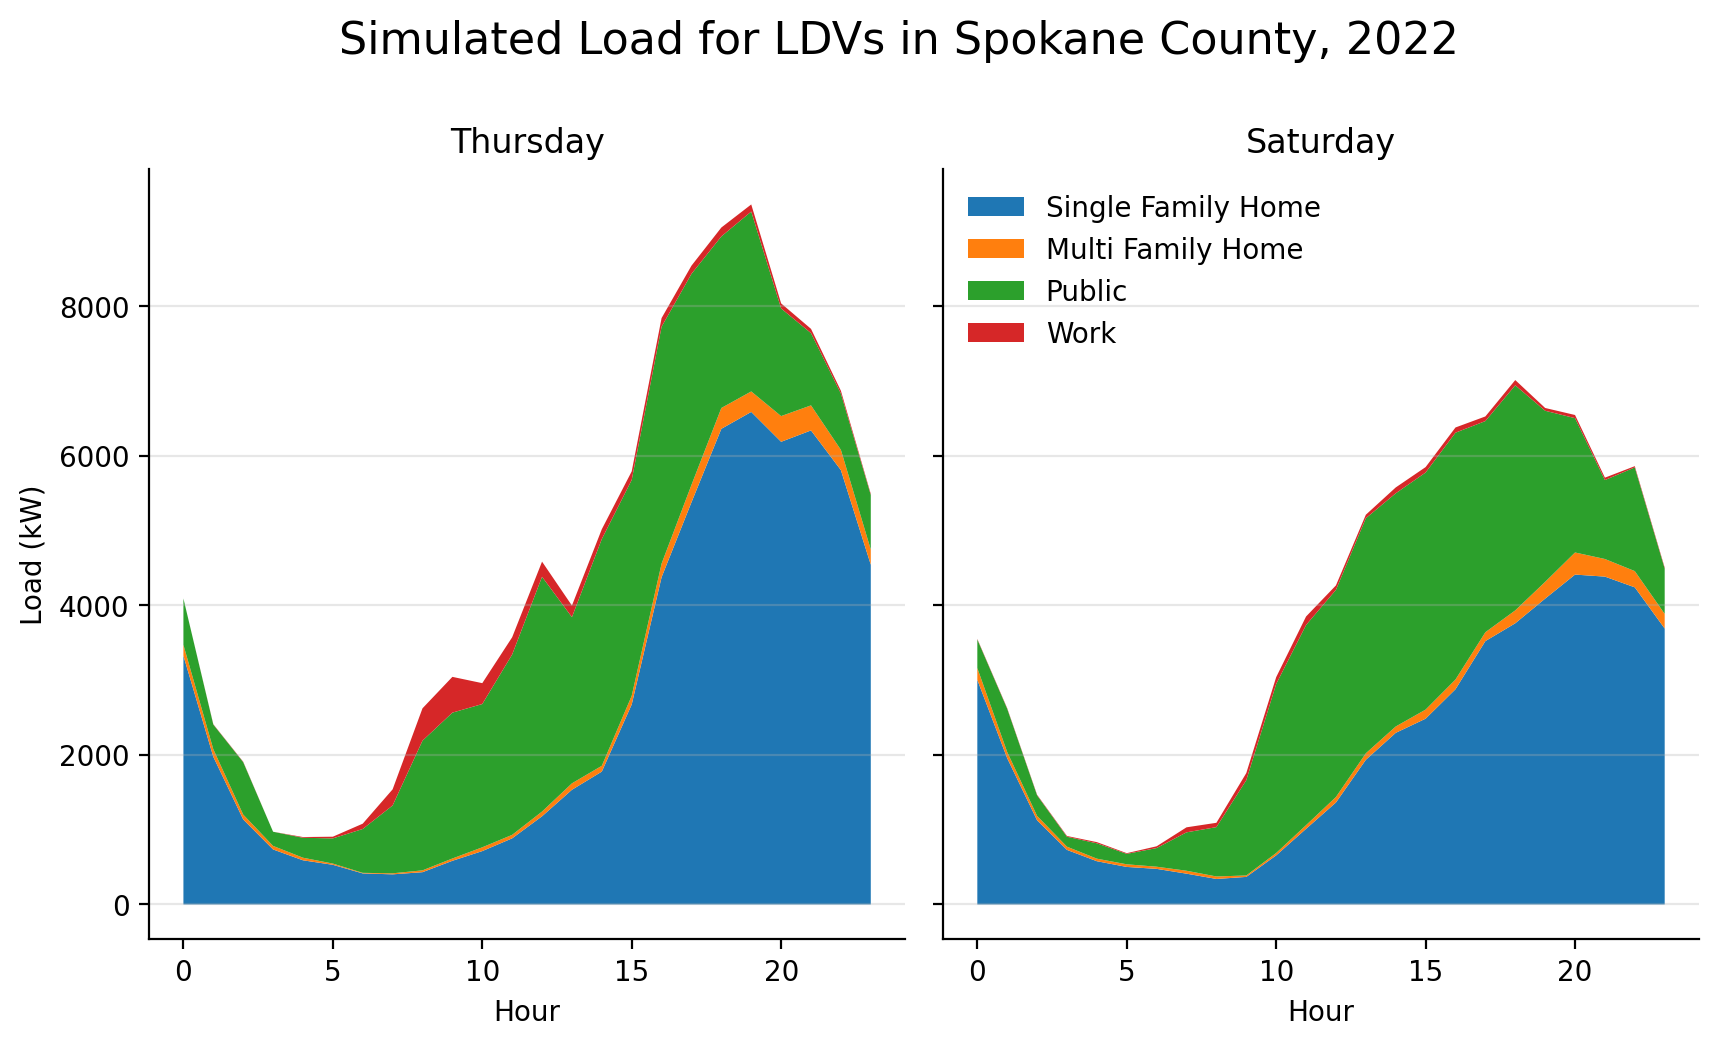

In [42]:
def plot_simulated_load(df_sub, fig_name):
    fig, axes = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
    for ax, day in zip(axes, ['thursday', 'saturday']):
        # locations = df_sub.location.unique().copy()[::-1]
        locations = ['single_family_home', 'multi_family_home', 'public', 'work',]
        max_load = 0
        base = [0]*len(set(df_sub.hour))
        for idx, loc in enumerate(locations):
            temp = df_sub.loc[(df_sub.weekday==day) & (df_sub.location==loc)].copy().sort_values(by='hour')
            load = list(np.array(base) + temp.load_kW)
            ax.grid(axis='y', which='major', alpha=0.3)
            ax.fill_between(x=list(temp.hour)+list(temp.hour)[::-1],
                        y1=load+base[::-1], 
                        label=locations[idx].replace('_',' ').title(),
                        alpha=1)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            base = load
            max_temp = np.max(base)
            max_load = np.max([max_temp, max_load])
        # ax.title(day.title())

    if day == 'saturday':
        plt.legend(loc='upper left', frameon=False)
    axes[0].set_title('Thursday')
    axes[1].set_title('Saturday')
    axes[0].set_ylabel('Load (kW)')
    axes[0].set_xlabel('Hour')
    axes[1].set_xlabel('Hour')

    fig.suptitle('Simulated Load for LDVs in Spokane County, 2022', 
                fontsize=16,
                y=1.03)
    plt.subplots_adjust(wspace=0.05)
    plt.savefig('../visualizations/simulated_load_LDV_spokane_2022.png', dpi=300, bbox_inches='tight')
    plt.show()
    return fig, axes

fig, axes = plot_simulated_load(df_sub, 'simulated_load_LDV_spokane_2022.png')


The percentage of peak load associated with each charger:

In [95]:
def load_frac_by_loc(df, day='thursday', hour=19):
    df_thu = df.loc[(df.weekday == day)& (df['hour'] == hour)].copy()
    df_peak_load = df_thu.groupby(by=['location']).sum().reset_index()
    total_load = df_peak_load.load_kW.sum()
    df_peak_load['load_frac_by_loc'] = df_peak_load.load_kW/total_load
    df_peak_load[['location', 'load_frac_by_loc']]
    return df_peak_load[['location', 'load_frac_by_loc']]

load_frac_by_loc(df, day='thursday', hour=19)


,location,load_frac_by_loc
0,multi_family_home,0.029289
1,public,0.256934
2,single_family_home,0.703603
3,work,0.010175


### sanity check: how many cars charging during peak?

In [16]:
# df_sub = df.groupby(by=['weekday', 'location', 'hour']).sum().reset_index()

In [85]:
df_thu = df.loc[(df.weekday=='thursday')].copy()
peakdf = df_thu[(df_thu['hour'] == 19)]
tot = len(peakdf)
peakdf['charge_type'].value_counts()/tot

charge_type
single_family_home     0.641893
public                 0.294438
multi_family_home      0.035103
non_office_work        0.012770
office                 0.009744
civic_institutional    0.006052
Name: count, dtype: float64

In [86]:
df_sub

,weekday,location,hour,charge_id,load_kW,window_start_time,window_end_time,person_id,charge_type,activity_id,...,building_type,resident_type,language,lat,lng,lat_work,lng_work,lat_school,lng_school,wfh
0,saturday,multi_family_home,0,6523871144267554683_base_dev_with_ldv_logic_20...,158.416737,473 days 10:00:00,494 days 00:00:00,1801188174668595167470914175966595172631299748...,multi_family_homemulti_family_homemulti_family...,6523871144267554683119027611393730799794397390...,...,multiple_unitsmultiple_unitsGQ_structuremultip...,corecorecorecorecorecorecorecorecorecorecoreco...,englishasian_pacificGQ_languageenglishenglishG...,23535.359904,-58064.592526,10150.790605,-25042.998752,4663.803201,-11522.844089,under_16_or_notinlfworked_in_personunder_16_or...
1,saturday,multi_family_home,1,6523871144267554683_base_dev_with_ldv_logic_20...,82.624443,0 days 00:00:00,20 days 14:00:00,1801188174668595167470914175966595172631299748...,multi_family_homemulti_family_homemulti_family...,6523871144267554683119027611393730799794397390...,...,multiple_unitsmultiple_unitsGQ_structuremultip...,corecorecorecorecorecorecorecorecorecorecoreco...,englishasian_pacificGQ_languageenglishenglishG...,23535.359904,-58064.592526,10150.790605,-25042.998752,4663.803201,-11522.844089,under_16_or_notinlfworked_in_personunder_16_or...
2,saturday,multi_family_home,2,6523871144267554683_base_dev_with_ldv_logic_20...,58.989713,20 days 14:00:00,41 days 04:00:00,1801188174668595167470914175966595172631299748...,multi_family_homemulti_family_homemulti_family...,6523871144267554683119027611393730799794397390...,...,multiple_unitsmultiple_unitsGQ_structuremultip...,corecorecorecorecorecorecorecorecorecorecoreco...,englishasian_pacificGQ_languageenglishenglishG...,23535.359904,-58064.592526,10150.790605,-25042.998752,4663.803201,-11522.844089,under_16_or_notinlfworked_in_personunder_16_or...
3,saturday,multi_family_home,3,6523871144267554683_base_dev_with_ldv_logic_20...,42.872623,41 days 04:00:00,61 days 18:00:00,1801188174668595167470914175966595172631299748...,multi_family_homemulti_family_homemulti_family...,6523871144267554683119027611393730799794397390...,...,multiple_unitsmultiple_unitsGQ_structuremultip...,corecorecorecorecorecorecorecorecorecorecoreco...,englishasian_pacificGQ_languageenglishenglishG...,23535.359904,-58064.592526,10150.790605,-25042.998752,4663.803201,-11522.844089,under_16_or_notinlfworked_in_personunder_16_or...
4,saturday,multi_family_home,4,6523871144267554683_base_dev_with_ldv_logic_20...,34.194093,61 days 18:00:00,82 days 08:00:00,1801188174668595167470914175966595172631299748...,multi_family_homemulti_family_homemulti_family...,6523871144267554683119027611393730799794397390...,...,multiple_unitsmultiple_unitsGQ_structuremultip...,corecorecorecorecorecorecorecorecorecorecoreco...,englishasian_pacificGQ_languageenglishenglishG...,23535.359904,-58064.592526,10150.790605,-25042.998752,4663.803201,-11522.844089,under_16_or_notinlfworked_in_personunder_16_or...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,thursday,work,19,6043159297730208345_base_dev_with_ldv_logic_20...,95.252662,354 days 00:00:00,373 days 16:00:00,1300782449648234190913014091246424398334130283...,non_office_workcivic_institutionalnon_office_w...,6043159297730208345160726250816934353274287372...,...,multiple_unitsmobileGQ_structuresingle_familym...,corecorecorecorecorecorecorecorecorecorecoreco...,englishenglishGQ_languageenglishenglishenglish...,22500.188824,-55457.092701,18154.504493,-44792.104513,1476.112558,-3641.662695,worked_in_personworked_in_personunder_16_or_no...
188,thursday,work,20,6043159297730208345_base_dev_with_ldv_logic_20...,67.762660,373 days 16:00:00,393 days 08:00:00,1300782449648234190913014091246424398334130283...,non_office_workcivic_institutionalnon_office_w...,6043159297730208345160726250816934353274287372...,...,multiple_unitsmobileGQ_structuresingle_familym...,corecorecorecorecorecorecorecorecorecoreco

In [60]:
len(df_thu), len(df_thu['person_id'].unique())

(396552, 15662)

In [79]:
peak_kw = df_thu[(df_thu['hour'] == 19) & (df_thu['load_kW'] > 0)]['load_kW'].sum()
num_cars = df_thu[(df_thu['hour'] == 19) & (df_thu['load_kW'] > 0)]['person_id'].unique().shape[0]
peak_kw/num_cars

3.8685256898765727